# Exploratory Data Analysis

In [1]:
#Import Relevant Library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
#Read the file
df = pd.read_csv('fuel_ferc1.csv')
df.head() # This shows the first five rows

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [3]:
df.tail() #This shows the last five rows in the dataframe

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
29518,f1_fuel_2018_12_12_0_13,12,2018,neil simpson ct #1,gas,mcf,18799.0,1.059,4.78,4.78,9.03
29519,f1_fuel_2018_12_12_1_1,12,2018,cheyenne prairie 58%,gas,mcf,806730.0,1.050,3.65,3.65,6.95
29520,f1_fuel_2018_12_12_1_10,12,2018,lange ct facility,gas,mcf,104554.0,1.060,4.77,4.77,8.99
29521,f1_fuel_2018_12_12_1_13,12,2018,wygen 3 bhp 52%,coal,ton,315945.0,16.108,3.06,14.76,1.11
29522,f1_fuel_2018_12_12_1_14,12,2018,wygen 3 bhp 52%,gas,mcf,17853.0,1.059,0.00,0.00,11.68


In [4]:
df.shape # This give us the number of rows and columns

(29523, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29523 entries, 0 to 29522
Data columns (total 11 columns):
record_id                       29523 non-null object
utility_id_ferc1                29523 non-null int64
report_year                     29523 non-null int64
plant_name_ferc1                29523 non-null object
fuel_type_code_pudl             29523 non-null object
fuel_unit                       29343 non-null object
fuel_qty_burned                 29523 non-null float64
fuel_mmbtu_per_unit             29523 non-null float64
fuel_cost_per_unit_burned       29523 non-null float64
fuel_cost_per_unit_delivered    29523 non-null float64
fuel_cost_per_mmbtu             29523 non-null float64
dtypes: float64(5), int64(2), object(4)
memory usage: 2.5+ MB


In [6]:
df.describe().T #This give a quick summary statistics of numerical columns in the dataset.

,count,mean,std,min,25%,50%,75%,max
utility_id_ferc1,29523.0,1.186018e+02,7.417835e+01,1.000000,55.0000,122.000000,176.000,5.140000e+02
report_year,29523.0,2.005806e+03,7.025483e+00,1994.000000,2000.0000,2006.000000,2012.000,2.018000e+03
fuel_qty_burned,29523.0,2.622119e+06,9.118004e+06,1.000000,13817.0000,253322.000000,1424034.000,5.558942e+08
fuel_mmbtu_per_unit,29523.0,8.492111e+00,1.060022e+01,0.000001,1.0240,5.762694,17.006,3.412600e+02
fuel_cost_per_unit_burned,29523.0,2.086490e+02,2.854490e+03,-276.080000,5.2070,26.000000,47.113,1.393580e+05
fuel_cost_per_unit_delivered,29523.0,9.175704e+02,6.877593e+04,-874.937000,3.7785,17.371000,42.137,7.964521e+06
fuel_cost_per_mmbtu,29523.0,1.930435e+01,2.091541e+03,-41.501000,1.9400,4.127000,7.745,3.592780e+05


In [7]:
#calculate the count and percentage of missing values
mask = df.isnull()
total = mask.sum()
percent = 100*mask.mean()

missing_data = pd.concat([total, percent], axis=1, join='outer',
                        keys=['count_missing', 'perc_missing'])
missing_data.sort_values(by='perc_missing', ascending=False,
                          inplace = True)
missing_data
#One column has missing values and it is 0.6% of the data that is missing.


,count_missing,perc_missing
fuel_unit,180,0.609694
record_id,0,0.000000
utility_id_ferc1,0,0.000000
report_year,0,0.000000
plant_name_ferc1,0,0.000000
fuel_type_code_pudl,0,0.000000
fuel_qty_burned,0,0.000000
fuel_mmbtu_per_unit,0,0.000000
fuel_cost_per_unit_burned,0,0.000000
fuel_cost_per_unit_delivered,0,0.000000


In [8]:
# Grouping helps to compute some statistiscs on our data.
fuel_type_grouped = df.groupby('fuel_type_code_pudl')

In [9]:
print(len(fuel_type_grouped))

6


In [10]:
fuel_type_grouped.groups

{'coal': Int64Index([    0,     1,     2,     3,     5,     7,     8,     9,    11,
                13,
             ...
             29485, 29487, 29489, 29492, 29501, 29503, 29510, 29516, 29517,
             29521],
            dtype='int64', length=8547),
 'gas': Int64Index([    4,    10,    12,    28,    30,    32,    33,    35,    37,
                39,
             ...
             29508, 29509, 29511, 29512, 29513, 29515, 29518, 29519, 29520,
             29522],
            dtype='int64', length=11486),
 'nuclear': Int64Index([    6,    45,    52,    53,    54,    69,    93,   105,   106,
               109,
             ...
             29025, 29040, 29051, 29063, 29081, 29177, 29187, 29318, 29390,
             29395],
            dtype='int64', length=818),
 'oil': Int64Index([   14,    19,    21,    23,    25,    27,    34,    36,    40,
                43,
             ...
             29490, 29491, 29495, 29499, 29500, 29502, 29505, 29506, 29507,
             29514],
    

In [11]:
# Find the first value for each categories
fuel_type_grouped.agg(lambda x: x.values[0])

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
fuel_type_code_pudl,,,,,,,,,,
coal,f1_fuel_1994_12_1_0_7,1,1994,rockport,ton,5377489.0,16.590000,18.590,18.530,1.121
gas,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,mcf,40533.0,1.000000,2.770,2.770,2.570
nuclear,f1_fuel_1994_12_2_1_1,2,1994,joseph m. farley,kgU,2260.0,0.064094,28.770,0.000,0.450
oil,f1_fuel_1994_12_6_0_2,6,1994,clinch river,bbl,6510.0,5.875338,32.130,23.444,5.469
other,f1_fuel_1994_12_11_0_6,11,1994,w.f. wyman,bbl,55652.0,0.149719,14.685,15.090,2.335
waste,f1_fuel_1994_12_9_0_3,9,1994,b.l. england,ton,2438.0,0.015939,34.180,34.180,1.072


In [12]:
for name, group in fuel_type_grouped:
    print(name, group.fuel_cost_per_unit_burned.mean())

coal 67.42182999882996
gas 13.659396569737135
nuclear 4955.157002444988
oil 168.87708568948383
other 18.253856287425158
waste 19.518122448979593


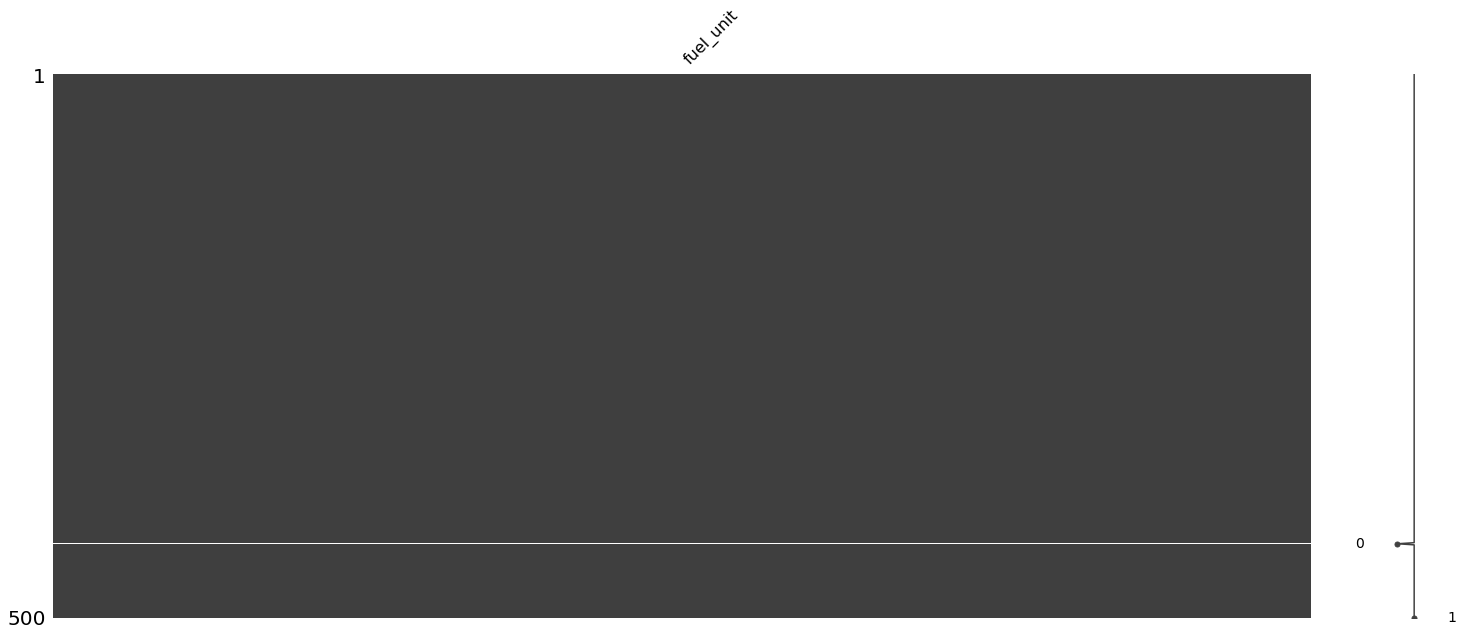

In [13]:
nullable_columns = df.columns[mask.any()].tolist()
msno.matrix(df[nullable_columns].sample(500))
plt.show()
#It shows a white string for fuel unit which means it has missing values.

In [14]:
#Replace missing values in fuel_unit with the most common(Mode)
df['fuel_unit'].fillna(df['fuel_unit'].mode()[0], inplace=True)

In [15]:
# find all numerical columns in the dataset
numerical_variables = df.select_dtypes(include=[np.number])
numerical_variables.columns

Index(['utility_id_ferc1', 'report_year', 'fuel_qty_burned',
       'fuel_mmbtu_per_unit', 'fuel_cost_per_unit_burned',
       'fuel_cost_per_unit_delivered', 'fuel_cost_per_mmbtu'],
      dtype='object')

In [16]:
# find all object columns in the dataset
object_variables = df.select_dtypes(include=[np.object])
object_variables.columns

Index(['record_id', 'plant_name_ferc1', 'fuel_type_code_pudl', 'fuel_unit'], dtype='object')

In [17]:
# We want to be sure our numeric columns are not categorical in ordinal form.
numerical_variables.nunique().sort_values()

report_year                        25
utility_id_ferc1                  185
fuel_mmbtu_per_unit             11227
fuel_cost_per_mmbtu             12605
fuel_cost_per_unit_delivered    16675
fuel_cost_per_unit_burned       19416
fuel_qty_burned                 26432
dtype: int64

In [18]:
object_variables.nunique().sort_values()

fuel_type_code_pudl        6
fuel_unit                  9
plant_name_ferc1        2315
record_id              29523
dtype: int64

In [19]:
# find the skewness of the features, this is to check their distribution
df.skew().sort_values()

report_year                       0.006953
utility_id_ferc1                  0.605070
fuel_mmbtu_per_unit               4.135217
fuel_qty_burned                  15.851495
fuel_cost_per_unit_burned        19.787440
fuel_cost_per_unit_delivered    105.014227
fuel_cost_per_mmbtu             171.675535
dtype: float64

In [20]:
#Check for the tailedness of the features(how long is the tail when skewed)
df.kurt()

utility_id_ferc1                    1.088432
report_year                        -1.145656
fuel_qty_burned                   651.369450
fuel_mmbtu_per_unit                55.595695
fuel_cost_per_unit_burned         485.255851
fuel_cost_per_unit_delivered    11765.054226
fuel_cost_per_mmbtu             29489.132594
dtype: float64

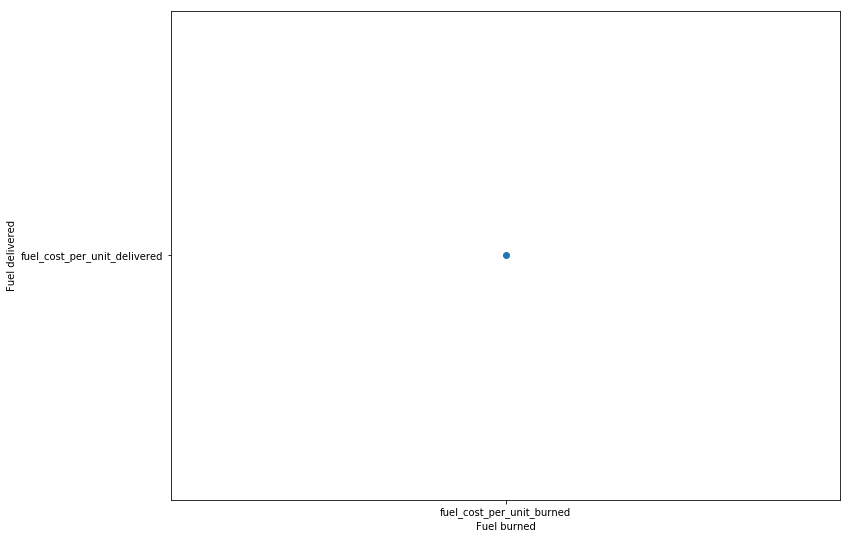

In [21]:
#Find the correlation between two continuous variables
plt.figure(figsize=(12,9))
plt.scatter(x="fuel_cost_per_unit_burned", y="fuel_cost_per_unit_delivered")
plt.xlabel('Fuel burned')
plt.ylabel('Fuel delivered')
plt.show()

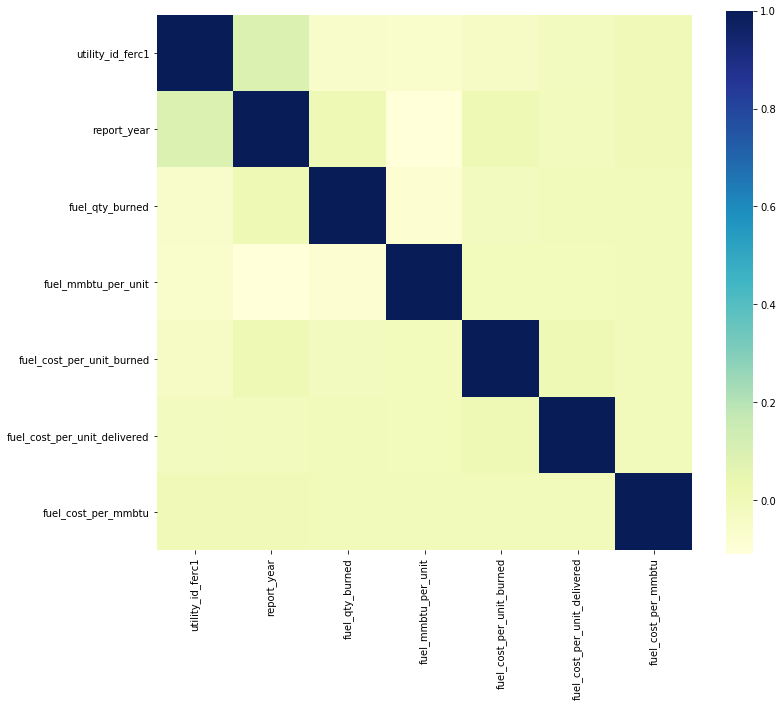

In [22]:
# Use heatmap to find correlation between all features
plt.figure(figsize = (12,10))
sns.heatmap(df.corr(), square=True, cmap="YlGnBu")
plt.show()

C:\Users\RUQOYYAH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


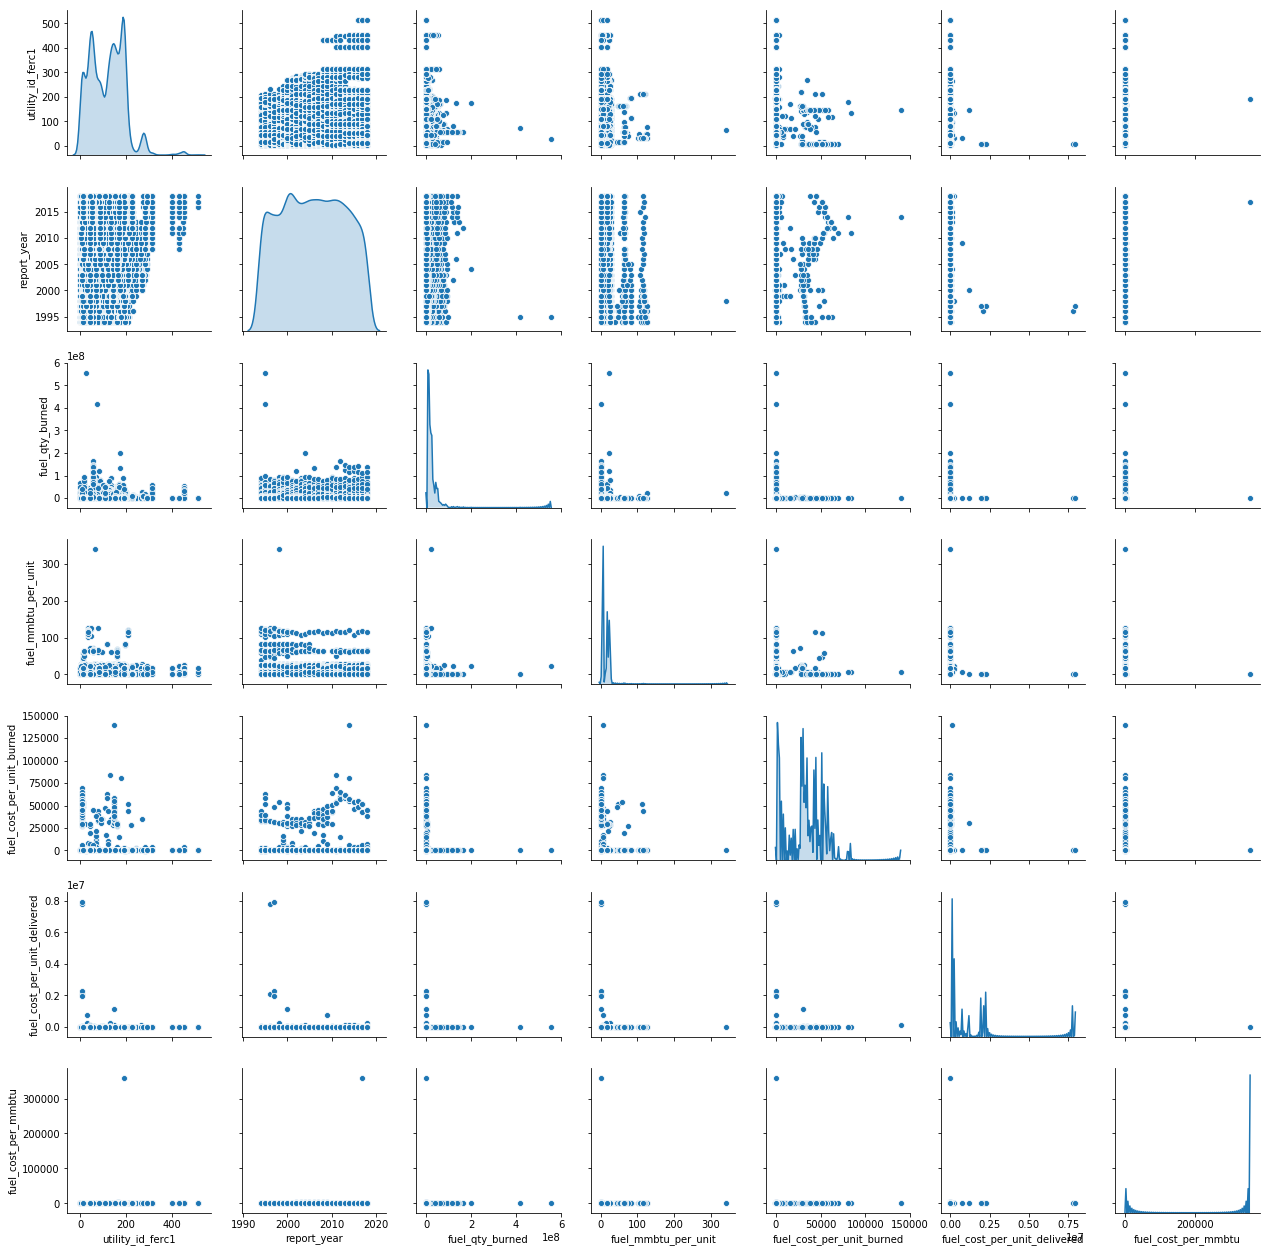

In [23]:
sns.pairplot(numerical_variables, kind='scatter', diag_kind='kde')
plt.show()

In [24]:
#Find how much all other features correlate with "fuel_cost_per_unit_burned"
corr_matrix = df.corr()
corr_matrix['fuel_cost_per_unit_burned'].sort_values(ascending=False)

fuel_cost_per_unit_burned       1.000000
report_year                     0.013599
fuel_cost_per_unit_delivered    0.011007
fuel_cost_per_mmbtu            -0.000437
fuel_mmbtu_per_unit            -0.010034
fuel_qty_burned                -0.018535
utility_id_ferc1               -0.037863
Name: fuel_cost_per_unit_burned, dtype: float64

C:\Users\RUQOYYAH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


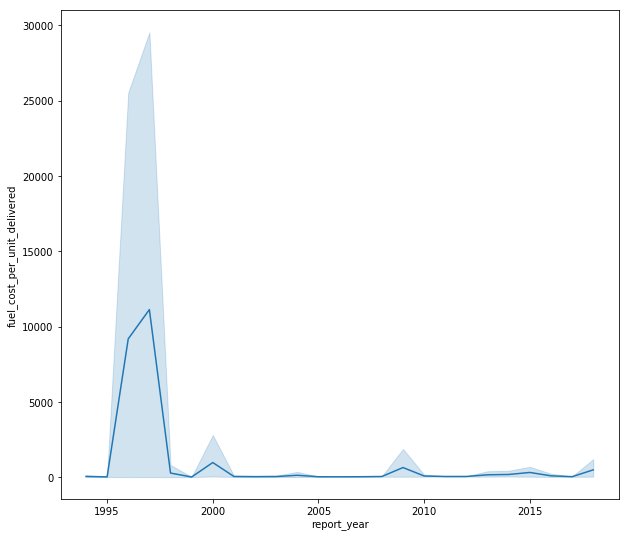

In [25]:
# Chat showing average cost per unit delivered
plt.figure(figsize=(10,9))
sns.lineplot(x="report_year",y="fuel_cost_per_unit_delivered", data=df)

C:\Users\RUQOYYAH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


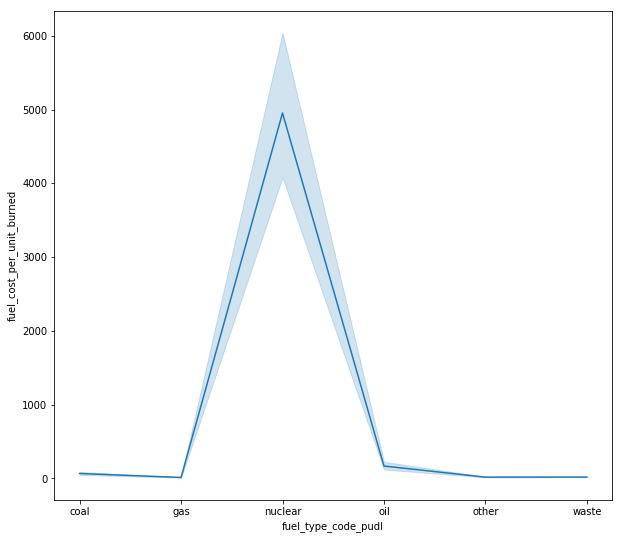

In [26]:
plt.figure(figsize=(10,9))
sns.lineplot(x="fuel_type_code_pudl",y="fuel_cost_per_unit_burned", data=df)

In [27]:
#Pandas profiling is a good tool for indepth analysis
import pandas_profiling as pf
data_report = pf.ProfileReport(df)
data_report.to_file('data_report.html')

C:\Users\RUQOYYAH\Anaconda3\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\RUQOYYAH\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\RUQOYYAH\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\RUQOYYAH\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\RUQOYYAH\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\RUQOYYAH\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 486, in start
    self.io_loop.start()
  